In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa22-csv/fifa22.csv


In [3]:
import pandas as pd

df = pd.read_csv(r"/kaggle/input/fifa22-csv/fifa22.csv")
df.head(10)


,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,170
1,188545,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,185
2,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,187
3,190871,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,175
4,192985,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181
5,200389,J. Oblak,Jan Oblak,GK,91,93,112000000.0,130000.0,28,188
6,231747,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,182
7,167495,M. Neuer,Manuel Peter Neuer,GK,90,90,13500000.0,86000.0,35,193
8,192448,M. ter Stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,187
9,202126,H. Kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,188


In [4]:
#df.drop("long_name", axis = 'columns')
df["short_name"] = df["short_name"].str.lower()
df.head(10)

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm
0,158023,l. messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,170
1,188545,r. lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,185
2,20801,cristiano ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,187
3,190871,neymar jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,175
4,192985,k. de bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181
5,200389,j. oblak,Jan Oblak,GK,91,93,112000000.0,130000.0,28,188
6,231747,k. mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,182
7,167495,m. neuer,Manuel Peter Neuer,GK,90,90,13500000.0,86000.0,35,193
8,192448,m. ter stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,187
9,202126,h. kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,188


In [5]:
df.nlargest(10, "value_eur")


,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm
6,231747,k. mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,182
29,239085,e. haaland,Erling Braut Haaland,ST,88,93,137500000.0,110000.0,20,194
9,202126,h. kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,188
3,190871,neymar jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,175
4,192985,k. de bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181
1,188545,r. lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,185
21,230621,g. donnarumma,Gianluigi Donnarumma,GK,89,93,119500000.0,110000.0,22,196
43,228702,f. de jong,Frenkie de Jong,"CM, CDM, CB",87,92,119500000.0,210000.0,24,180
45,233049,j. sancho,Jadon Sancho,"RM, CF, LM",87,91,116500000.0,150000.0,21,180
44,231281,t. alexander-arnold,Trent Alexander-Arnold,RB,87,92,114000000.0,150000.0,22,180


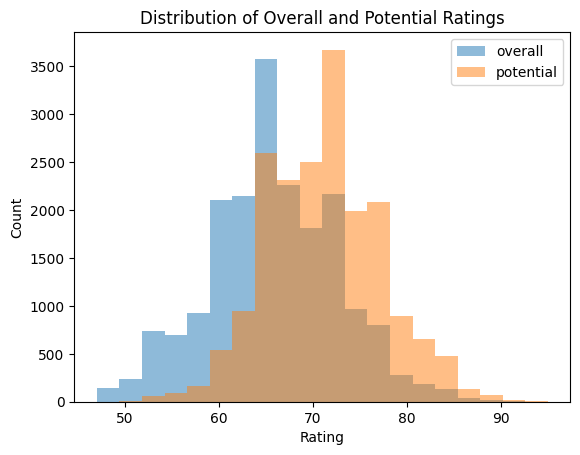

In [6]:
import matplotlib.pyplot as plt
df[["overall", "potential"]].plot(kind='hist', alpha=0.5, bins=20)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Overall and Potential Ratings")
plt.legend(["overall", "potential"])
plt.show()

In [7]:
df["Potential/Wage"] = df["potential"] / df["wage_eur"]
df["Value/Wage"] = df["value_eur"] / df["wage_eur"]
#additional method
df["Overall/Wage"] = df["overall"] / df["wage_eur"]
df.head(10)

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,Potential/Wage,Value/Wage,Overall/Wage
0,158023,l. messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,0.000291,243.750000,0.000291
1,188545,r. lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,185,0.000341,442.592593,0.000341
2,20801,cristiano ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,187,0.000337,166.666667,0.000337
3,190871,neymar jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,175,0.000337,477.777778,0.000337
4,192985,k. de bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,0.000260,358.571429,0.000260
5,200389,j. oblak,Jan Oblak,GK,91,93,112000000.0,130000.0,28,188,0.000715,861.538462,0.000700
6,231747,k. mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,182,0.000413,843.478261,0.000396
7,167495,m. neuer,Manuel Peter Neuer,GK,90,90,13500000.0,86000.0,35,193,0.001047,156.976744,0.001047
8,192448,m. ter stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,187,0.000368,396.000000,0.000360
9,202126,h. kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,188,0.000375,539.583333,0.000375


In [8]:
df.nlargest(5, "Potential/Wage")

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,Potential/Wage,Value/Wage,Overall/Wage
1450,246618,a. hložek,Adam Hložek,"ST, LM, RM",76,87,16000000.0,500.0,18,188,0.174,32000.0,0.152
3825,262578,m. vušković,Mario Vušković,CB,72,85,5000000.0,500.0,19,189,0.170,10000.0,0.144
7335,252508,k. kozłowski,Kacper Kozłowski,"CAM, CM",68,85,3000000.0,500.0,17,178,0.170,6000.0,0.136
7454,262585,s. biuk,Stipe Biuk,"LM, LW",68,85,3100000.0,500.0,18,182,0.170,6200.0,0.136
4575,256970,a. karabec,Adam Karabec,"CAM, CM, LM",71,84,4300000.0,500.0,17,185,0.168,8600.0,0.142


In [9]:
df.nlargest(5, "Value/Wage")

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,Potential/Wage,Value/Wage,Overall/Wage
282,241671,d. livaković,Dominik Livaković,GK,82,87,35000000.0,1000.0,26,187,0.0870,35000.0,0.082
506,244369,v. tsygankov,Viktor Tsygankov,RM,80,86,33500000.0,1000.0,23,178,0.0860,33500.0,0.080
1450,246618,a. hložek,Adam Hložek,"ST, LM, RM",76,87,16000000.0,500.0,18,188,0.1740,32000.0,0.152
1453,246791,m. solomon,Manor Solomon,"RM, LM, CAM",76,86,17000000.0,800.0,21,170,0.1075,21250.0,0.095
1454,247641,tete,Mateus Cardoso Lemos Martins,RM,76,86,17000000.0,800.0,21,175,0.1075,21250.0,0.095


In [10]:
df.nlargest(5, "Overall/Wage")

,sofifa_id,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,Potential/Wage,Value/Wage,Overall/Wage
1450,246618,a. hložek,Adam Hložek,"ST, LM, RM",76,87,16000000.0,500.0,18,188,0.174,32000.0,0.152
1467,142902,a. pyatov,Andriy Pyatov,GK,75,75,625000.0,500.0,37,190,0.150,1250.0,0.150
2375,241769,d. akpeyi,Daniel Akpeyi,GK,74,74,475000.0,500.0,35,189,0.148,950.0,0.148
3122,177299,a. gabbarini,Adrián José Gabbarini,GK,72,72,250000.0,500.0,35,184,0.144,500.0,0.144
3654,234054,c. cáceda,Carlos Alberto Cáceda Oyaguez,GK,72,72,1600000.0,500.0,29,185,0.144,3200.0,0.144


In [11]:
print(df.iloc[[1450]])
#most underrated player

      sofifa_id short_name    long_name player_positions  overall  potential  \
1450     246618  a. hložek  Adam Hložek       ST, LM, RM       76         87   

       value_eur  wage_eur  age  height_cm  Potential/Wage  Value/Wage  \
1450  16000000.0     500.0   18        188           0.174     32000.0   

      Overall/Wage  
1450         0.152  


In [12]:
df["height_cm"] = df["height_cm"]*100 #accidently ran block twice


In [13]:
df.to_csv("processed_players.csv", index=False)
df.to_parquet("processed_players.parquet", index=False)

In [14]:
def find_players(df, position, budget):
    # Filter players by position and budget
    filtered_players = df[(df["player_positions"] == position) & (df["value_eur"] <= budget)]
    
    # Sort by overall rating in descending order
    sorted_players = filtered_players.sort_values(by="overall", ascending=False)
    
    return sorted_players[["short_name", "potential", "value_eur"]]

print(find_players(df, "RM", 1000000000000))


          short_name  potential   value_eur
506     v. tsygankov         86  33500000.0
617       e. buendía         84  26500000.0
563      a. carrillo         79  17000000.0
748       r. ghezzal         78  14000000.0
1074   salvi sánchez         77  10000000.0
...              ...        ...         ...
19040    m. hanratty         60    100000.0
19059     o. kennedy         58    100000.0
19071     l. kervick         58    100000.0
19151    m. mcfadden         64    110000.0
19232     m. o'brien         61    110000.0

[196 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Save the scaled dataset in CSV format
df.to_csv("scaled_processed.csv", index=False)